In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from analysis.models.vr import RatCAVESession
from analysis.plots.placecells.F02_AB_cells import all_AB_cells, gain_comparison_plot
from analysis.plots.trajectory import arena_vs_animal_positions

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Overview

In [32]:
# 00908
sessions = [
    "2019-07-11_17-53-49",  # 1 putative cell VR-locked, some cells arena-locked
    "2019-07-11_21-31-21",  # no VR locked
    "2019-07-12_08-50-21",  # no VR locked
    "2019-07-12_13-41-38",  # no VR locked
    "2019-07-13_12-03-49"   # no VR locked
]


# 003281
sessions = [
    "2019-10-24_21-54-05",  # 3-4, 4-3, 4-7 arena
    "2019-10-30_09-16-09",  # 2-2, 2-6 arena
    "2019-10-31_15-29-26",  
    "2019-11-01_13-26-47",  # 3-6, 3-7, 3-10? VR, 3-11? conj
    "2019-11-06_22-02-49"   # 7-5 VR, 2-2+ conj, others need to carefully look
]


# 003282
sessions = [
    "2019-11-05_13-58-28"
]
    
source = '/home/andrey/storage2/andrey/data/processed'
animal = '003281'
session_id = "2019-11-06_22-02-49"

sessionpath = os.path.join(source, animal, session_id)

session = RatCAVESession(sessionpath, alpha=4.3)
running_idxs = session.get_running_indexes()[0]

#session.trajectory = session.trajectory[500:]  # remove first 5 seconds to exclude bad positions

if not os.path.exists(os.path.join(sessionpath, 'analysis')):
    os.makedirs(os.path.join(sessionpath, 'analysis'))
    
if not os.path.exists(os.path.join(sessionpath, 'units')):
    os.makedirs(os.path.join(sessionpath, 'units'))

In [33]:
session.tetrodes[3] = {}  # supress cortical units in this session

session.tetrode_unit_map

{1: [], 2: [2, 3], 3: [], 4: [], 5: [], 6: [], 7: [2, 3, 4, 5, 6, 7, 8], 8: []}

# Preparing data

In [34]:
t_start = session.trajectory[0][0]
#t_shift = t_start + 300

# cut the bad data outside arena
x_lim = [-0.55, 0.20]
y_lim = [-0.75, 0.90]

traj = session.trajectory
session.trajectory = traj[(traj[:, 1] > x_lim[0]) & (traj[:, 1] < x_lim[1])]

# Arena positions WITH or WITHOUT gain
#ar_traj_0 = traj[(traj[:, 0] % 60 > 5) & (traj[:, 0] % 60 < 30)]
#ar_traj_1 = traj[(traj[:, 0] % 60 > 35) & (traj[:, 0] % 60 < 60)]

traj = session.arena_trajectory
ar_traj_1 = traj[(traj[:, 0] % 120 > 60) & (traj[:, 0] % 120 < 120)]
ar_traj_0 = traj[(traj[:, 0] % 120 > 0) & (traj[:, 0] % 120 < 60)]



# Animal positions WITH or WITHOUT gain
traj = session.trajectory
# an_traj_0 = traj[(traj[:, 0] % 60 > 5) & (traj[:, 0] % 60 < 30) & (traj[:, 1] < 0.2) & (traj[:, 2] < 0.9)]
# an_traj_1 = traj[(traj[:, 0] % 60 > 35) & (traj[:, 0] % 60 < 60) & (traj[:, 1] < 0.2) & (traj[:, 2] < 0.9)]

# an_traj_0_idxs = np.where((traj[:, 0] % 60 > 5) & (traj[:, 0] % 60 < 30) & (traj[:, 1] < 0.2) & (traj[:, 2] < 0.9))[0]
# an_traj_1_idxs = np.where((traj[:, 0] % 60 > 35) & (traj[:, 0] % 60 < 60) & (traj[:, 1] < 0.2) & (traj[:, 2] < 0.9))[0]

traj_norm = traj[:, 0] - t_start 

an_traj_1 = traj[(traj_norm % 120 > 60) & (traj_norm % 120 < 120)]
an_traj_0 = traj[(traj_norm % 120 > 0) & (traj_norm % 120 < 60)]

an_traj_1_idxs = np.where((traj_norm % 120 > 60) & (traj_norm % 120 < 120))[0]
an_traj_0_idxs = np.where((traj_norm % 120 > 0) & (traj_norm % 120 < 60))[0]

# Arena and animal Z positions

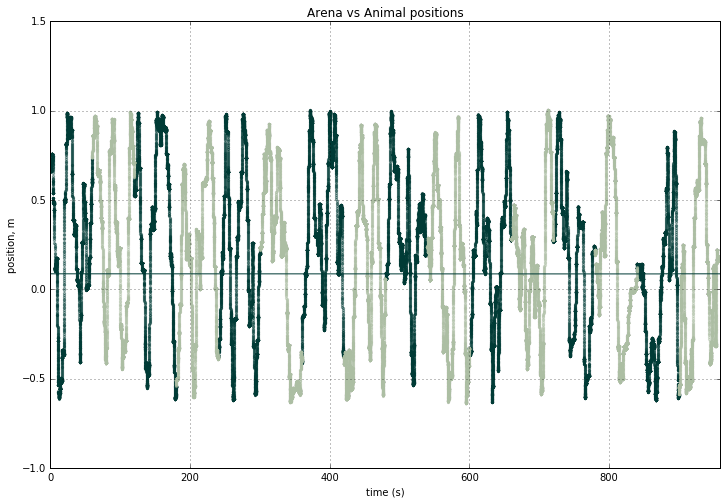

In [35]:
fig = arena_vs_animal_positions(session.arena_trajectory, an_traj_0, an_traj_1)

# All cells firing maps

Processing unit group 7..

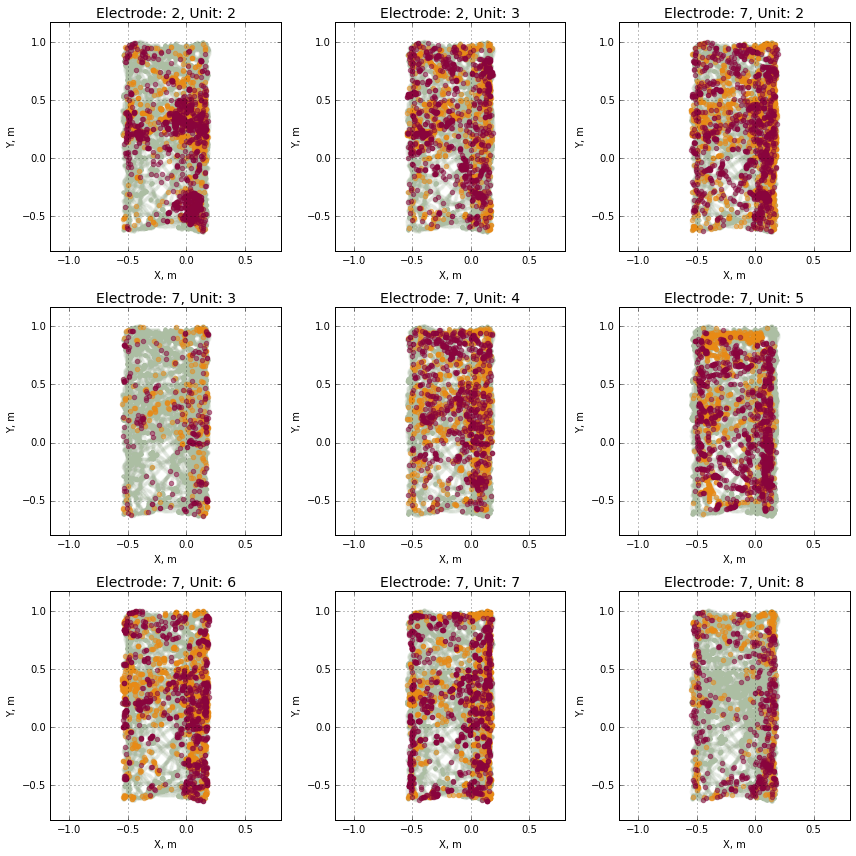

In [36]:
fig = all_AB_cells(session, an_traj_0_idxs, an_traj_1_idxs)

filename = "all_units.png"
fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

# Gain comparison

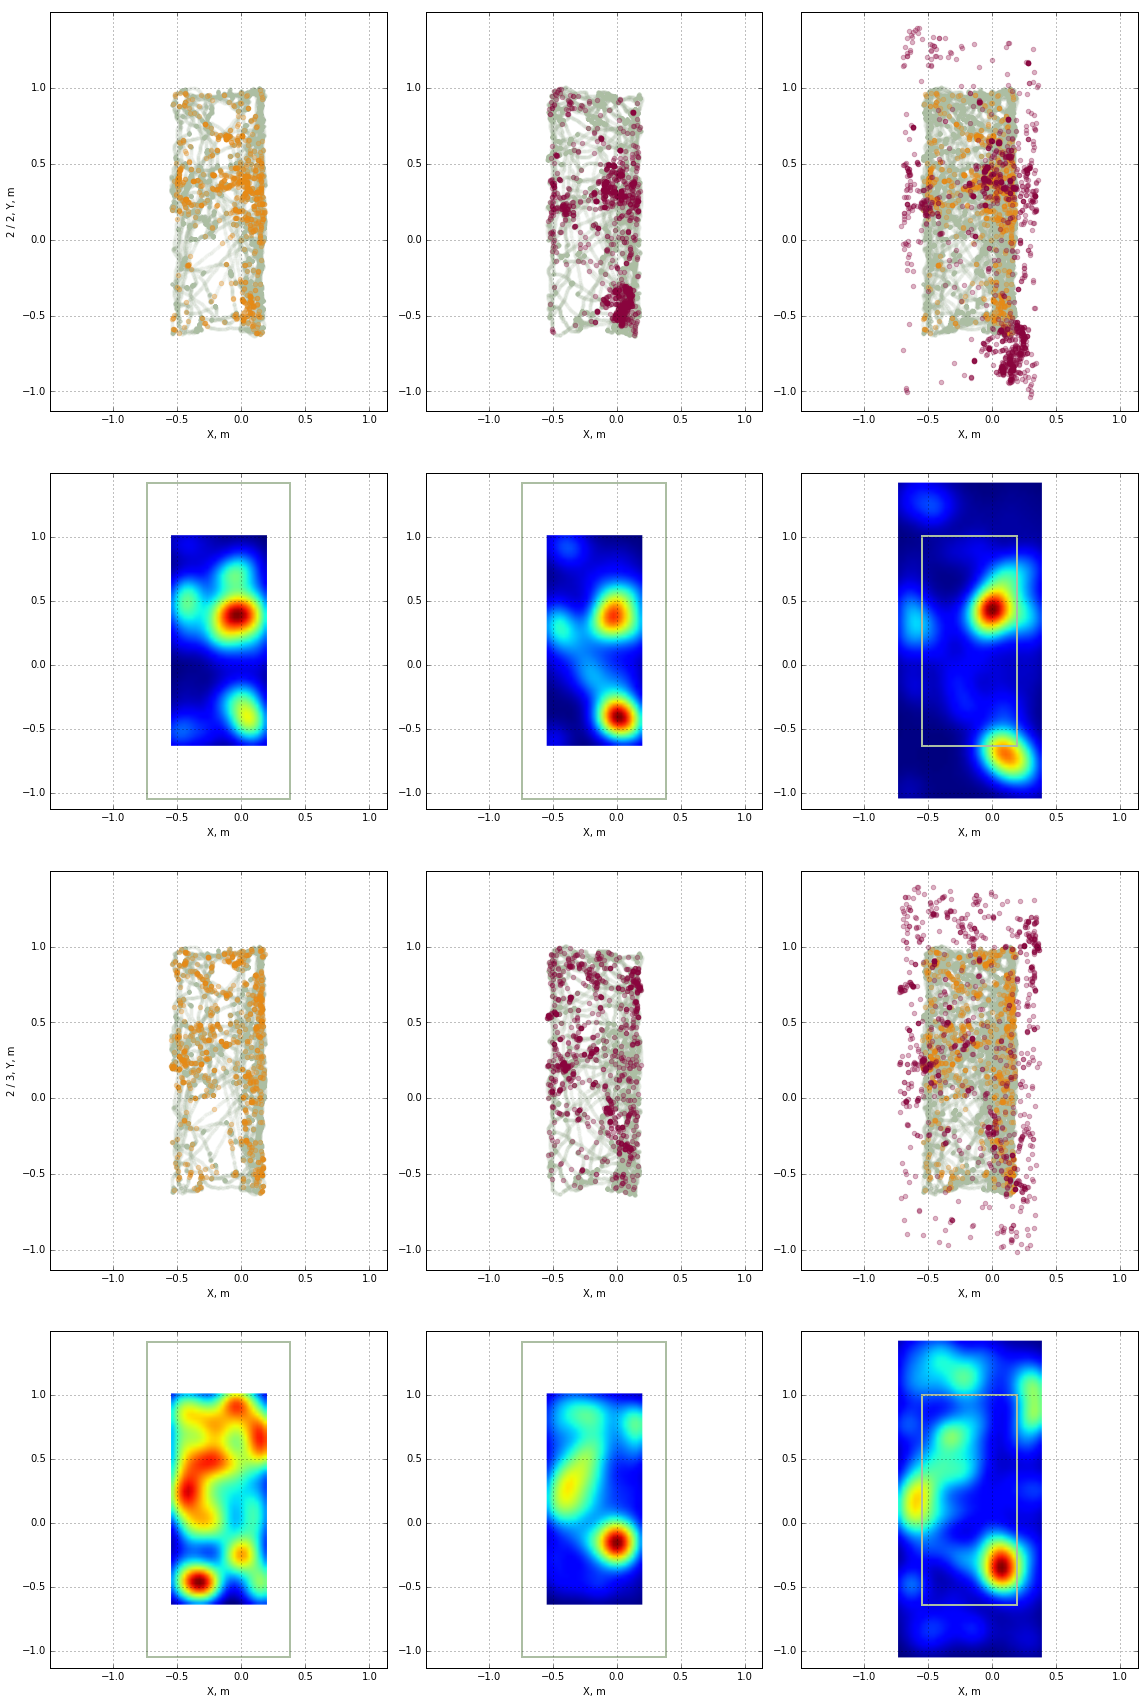

In [38]:
ttd_map = {
    2: [2, 3],
    #7: [2, 3, 4, 5, 6, 7, 8],
    #4: [2, 3, 4, 5, 6]
    #5: [2, 3]
}

#fig = gain_comparison_plot(ttd_map, an_traj_0, an_traj_1, an_traj_0_idxs, an_traj_1_idxs)
fig = gain_comparison_plot(session, ttd_map, an_traj_0, an_traj_1, an_traj_0_idxs, an_traj_1_idxs)

filename = "gain_comparison_2.png"
fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

In [87]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.5f}'.format}, linewidth=130)

session.trajectory[0:10, [0, -1]]

array([[1562873484.41180,      19319.99502],
       [1562873484.42180,      19619.99474],
       [1562873484.43280,      19949.99943],
       [1562873484.44380,      20279.99697],
       [1562873484.45480,      20609.99451],
       [1562873484.46480,      20909.99422],
       [1562873484.47480,      21209.99393],
       [1562873484.48680,      21569.99645],
       [1562873484.49680,      21869.99617],
       [1562873484.50780,      22199.99371]])